# Image Metadata Retrieval with ThanoSQL

## Introduction
Managing and retrieving large image datasets is a common challenge for photographers, art galleries, and companies involved in poster production or exhibitions. This use case will guide you through the process of using ThanoSQL to handle and query large datasets of images and their metadata. By the end of this use case, you will be able to search for images based on both image and text inputs and retrieve detailed metadata about the images, such as dimensions and photographer information.

## Running the Tutorial in Different Environments
This tutorial can be executed both within ThanoSQL Lab and in a local Python/Jupyter environment. Whether you prefer to work directly within ThanoSQL Lab's integrated environment or set up a local development environment on your machine, the instructions provided will guide you through the necessary steps.

## Dataset
We will be working with two datasets:

- **Unsplash Embedding Sample Table (unsplash_embed_sample)**: Contains detailed metadata about the images including information about the photographer, camera settings, and location.
  - `photo_id`: Unique identifier for each photo.
  - `photo_url`: URL of the photo on Unsplash.
  - `photo_image_url`: URL of the photo image.
  - `photo_submitted_at`: Date when the photo was submitted.
  - `photo_featured`: Indicates if the photo is featured.
  - `photo_width`: Width of the photo in pixels.
  - `photo_height`: Height of the photo in pixels.
  - `photo_aspect_ratio`: Aspect ratio of the photo.
  - `photo_description`: Description of the photo.
  - `photographer_username`: Username of the photographer.
  - `photographer_first_name`: First name of the photographer.
  - `photographer_last_name`: Last name of the photographer.
  - `exif_camera_make`: Camera make.
  - `exif_camera_model`: Camera model.
  - `exif_iso`: ISO setting of the camera.
  - `exif_aperture_value`: Aperture value.
  - `exif_focal_length`: Focal length.
  - `exif_exposure_time`: Exposure time.
  - `photo_location_name`: Name of the photo location.
  - `photo_location_latitude`: Latitude of the photo location.
  - `photo_location_longitude`: Longitude of the photo location.
  - `photo_location_country`: Country of the photo location.
  - `photo_location_city`: City of the photo location.
  - `stats_views`: Number of views.
  - `stats_downloads`: Number of downloads.
  - `ai_description`: AI-generated description of the photo.
  - `ai_primary_landmark_name`: AI-generated primary landmark name.
  - `ai_primary_landmark_latitude`: Latitude of the AI-generated primary landmark.
  - `ai_primary_landmark_longitude`: Longitude of the AI-generated primary landmark.
  - `ai_primary_landmark_confidence`: Confidence of the AI-generated primary landmark.
  - `blur_hash`: Blur hash of the image.
- **Unsplash Metadata Sample Table (unsplash_meta_sample)**: Contains image paths and their corresponding embeddings.
  - `photo_id`: Unique identifier for each photo.
  - `image_path`: Path to the image.
  - `embedding`: Embedding vector of the image.


    
## Goals
1. Obtain photo files and their metadata (e.g., photo dimensions, photographer names).
2. Perform advanced queries on both structured and unstructured data using ThanoSQL to retrieve the desired metadata.

## Procedure

### Download Datasets

First, we will download and load the datasets into pandas DataFrames and display their shapes to understand the structure and size of the data.

In [30]:
!wget -O use_case_2_data.zip https://raw.githubusercontent.com/smartmind-team/assets/main/datasets/use_cases/use_case_2_data.zip

--2024-06-11 01:42:35--  https://raw.githubusercontent.com/smartmind-team/assets/main/datasets/use_cases/use_case_2_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32958562 (31M) [application/zip]
Saving to: ‘use_case_2_data.zip’

use_case_2_data.zip 100%[===================>]  31.43M  --.-KB/s    in 0.1s    

2024-06-11 01:42:35 (299 MB/s) - ‘use_case_2_data.zip’ saved [32958562/32958562]



In [31]:
!unzip use_case_2_data.zip

Archive:  use_case_2_data.zip
   creating: unsplash_data/
   creating: unsplash_data/.ipynb_checkpoints/
  inflating: unsplash_data/bygTaBey1Xk.jpg  
  inflating: unsplash_data/aDUZbFgW3u4.jpg  
  inflating: unsplash_data/Nw8j0pBvRWg.jpg  
  inflating: unsplash_data/gXSFnk2a9V4.jpg  
  inflating: unsplash_data/grg6-DNJuaU.jpg  
  inflating: unsplash_data/fUbtdL_adv0.jpg  
  inflating: unsplash_data/tkk8_HakQ98.jpg  
  inflating: unsplash_data/whOkVvf0_hU.jpg  
  inflating: unsplash_data/sO42hhChB1c.jpg  
  inflating: unsplash_data/Sf8g7a3duRY.jpg  
  inflating: unsplash_embed_sample.csv  
  inflating: unsplash_meta_sample.csv  
  inflating: unsplash_meta.csv       
  inflating: unsplash_embed.csv      
  inflating: coastal_cliff.jpg       
  inflating: dog.jpg                 


In [3]:
import pandas as pd
unsplash_meta = pd.read_csv("unsplash_meta.csv")
unsplash_embed = pd.read_csv("unsplash_embed.csv")
unsplash_embed_sample = pd.read_csv("unsplash_embed_sample.csv")
unsplash_meta_sample = pd.read_csv("unsplash_meta_sample.csv")   

print("unsplash_meta:", unsplash_meta.shape, "unsplash_embed:", unsplash_embed.shape)
print("unsplash_meta_sample:", unsplash_meta_sample.shape, "unsplash_embed_sample:", unsplash_embed_sample.shape)

unsplash_meta: (17621, 32) unsplash_embed: (17621, 2)
unsplash_meta_sample: (10, 32) unsplash_embed_sample: (10, 2)


This step loads the datasets into pandas DataFrames and prints their shapes to give an overview of the data size and structure.

### Import ThanoSQL Library

Next, we need to import the ThanoSQL library and create a client instance. This client will be used to interact with the ThanoSQL engine.

**You can find your API Token and Engine URL by following these steps:**

1. Go to your workspace’s settings page.
2. Navigate to the "Developer" tab.
3. Locate and copy your API Token and Engine URL.

In [4]:
from thanosql import ThanoSQL
client = ThanoSQL(api_token="your_api_token", engine_url="engine_url")

### Upload Data to Tables

We upload the `unsplash_embed_sample` table to ThanoSQL. This table contains image paths and their corresponding embeddings.

In [6]:
table = client.table.upload('unsplash_embed_sample', 'unsplash_embed_sample.csv', if_exists='replace')
table.get_records(limit=10).to_df()

,photo_id,image_path
0,bygTaBey1Xk,/home/jovyan/tutorial_2_search/unsplash_data/b...
1,gXSFnk2a9V4,/home/jovyan/tutorial_2_search/unsplash_data/g...
2,grg6-DNJuaU,/home/jovyan/tutorial_2_search/unsplash_data/g...
3,sO42hhChB1c,/home/jovyan/tutorial_2_search/unsplash_data/s...
4,tkk8_HakQ98,/home/jovyan/tutorial_2_search/unsplash_data/t...
5,aDUZbFgW3u4,/home/jovyan/tutorial_2_search/unsplash_data/a...
6,whOkVvf0_hU,/home/jovyan/tutorial_2_search/unsplash_data/w...
7,fUbtdL_adv0,/home/jovyan/tutorial_2_search/unsplash_data/f...
8,Sf8g7a3duRY,/home/jovyan/tutorial_2_search/unsplash_data/S...
9,Nw8j0pBvRWg,/home/jovyan/tutorial_2_search/unsplash_data/N...


This step uploads the `unsplash_embed_sample` data to ThanoSQL and retrieves the first 10 records to confirm the upload.

Similarly, we upload the `unsplash_meta_sample` table which contains detailed metadata about the images.

In [8]:
table = client.table.upload('unsplash_meta_sample', 'unsplash_meta_sample.csv', if_exists='replace')
table.get_records(limit=10).to_df()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash,image_path
0,bygTaBey1Xk,https://unsplash.com/photos/bygTaBey1Xk,https://images.unsplash.com/uploads/1413387620...,2014-10-15,t,4635,3070,1.51,None,jaspervandermeij,...,None,1708356,19085,sea and rock cliff with grasses under cloudy sky,Neist Point,57.428387,-6.783028,30.348906,LcE{wnIVRixt~WR+NGjbxukCWBWB,/home/jovyan/tutorial_2_search/unsplash_data/b...
1,gXSFnk2a9V4,https://unsplash.com/photos/gXSFnk2a9V4,https://images.unsplash.com/reserve/jEs6K0y1Sb...,2014-07-10,t,2448,3264,0.75,Coastline view,kimberlyrichards,...,Tillamook,9895033,74702,aerial photography of seashore,None,NaN,NaN,NaN,LXE4G#IARjj]GdWFxaWBDOxaofj[,/home/jovyan/tutorial_2_search/unsplash_data/g...
2,grg6-DNJuaU,https://unsplash.com/photos/grg6-DNJuaU,https://images.unsplash.com/uploads/1412192004...,2014-10-01,t,5184,3456,1.50,None,marcusdallcol,...,None,8967968,38338,man surfboarding on ocean wave during daytime,None,NaN,NaN,NaN,LcHx?5R%Rjof01bHWBof4ooMoeax,/home/jovyan/tutorial_2_search/unsplash_data/g...
3,sO42hhChB1c,https://unsplash.com/photos/sO42hhChB1c,https://images.unsplash.com/reserve/ijl3tATFRp...,2014-08-19,t,4896,3264,1.50,Hazy Ocean Waters,arturpokusin,...,None,2071752,10860,body of water,None,NaN,NaN,NaN,LyOzVsj[aefQ_4j[ayj[IUayj[ay,/home/jovyan/tutorial_2_search/unsplash_data/s...
4,tkk8_HakQ98,https://unsplash.com/photos/tkk8_HakQ98,https://images.unsplash.com/reserve/6vaWXsQuSW...,2014-05-05,t,2000,1333,1.50,Silhouettes In Desert,carlov,...,None,2720281,9081,car on desert during sunset,None,NaN,NaN,NaN,"LYEV]I%19ZR+-=s,RkWW00WB%2j[",/home/jovyan/tutorial_2_search/unsplash_data/t...
5,aDUZbFgW3u4,https://unsplash.com/photos/aDUZbFgW3u4,https://images.unsplash.com/photo-141534083939...,2014-11-07,t,6016,4016,1.50,Smooth rocks under a bridge,timmossholder,...,"Bend, OR",1396901,8001,body of water near bridge during daytime,None,NaN,NaN,NaN,LZG[ylIU9Foy~pE0aft7_3RPRjR*,/home/jovyan/tutorial_2_search/unsplash_data/a...
6,whOkVvf0_hU,https://unsplash.com/photos/whOkVvf0_hU,https://images.unsplash.com/photo-143126315497...,2015-05-10,t,4272,2848,1.50,White lilac,veri_ivanova,...,None,36535677,243745,white flowers,None,NaN,NaN,NaN,LHJkv7_49GR%?cD%axt79ZxuWBWB,/home/jovyan/tutorial_2_search/unsplash_data/w...
7,fUbtdL_adv0,https://unsplash.com/photos/fUbtdL_adv0,https://images.unsplash.com/photo-143116202015...,2015-05-09,t,3264,2448,1.33,Sea of dunes,chiara,...,None,3359379,15447,desert during daytime,None,NaN,NaN,NaN,"LuHL9$Ips,oL?ww^WCWW?cIqs.WW",/home/jovyan/tutorial_2_search/unsplash_data/f...
8,Sf8g7a3duRY,https://unsplash.com/photos/Sf8g7a3duRY,https://images.unsplash.com/photo-143992327406...,2015-08-18,t,6016,3399,1.77,None,anfalshams,...,Anchal,10891770,105745,blue and black starry skies,None,NaN,NaN,NaN,L51gcgpyZ}aKpJo#adazi^jEaya|,/home/jovyan/tutorial_2_search/unsplash_data/S...
9,Nw8j0pBvRWg,https://unsplash.com/photos/Nw8j0pBvRWg,https://images.unsplash.com/photo-143879750899...,2015-08-05,t,3500,2336,1.50,None,tashography,...,None,729601,3582,brown mountain near trees low angle photograph,None,NaN,NaN,NaN,LpDTn~j]XTfkpfayRjay9ZayaJkC,/home/jovyan/tutorial_2_search/unsplash_data/N...


This step uploads the `unsplash_meta_sample` data to ThanoSQL and retrieves the first 10 records to confirm the upload.

### Create Embedding Column

To store the embedding vectors, we need to create an embedding column in the `unsplash_embed_sample` table.

In [10]:
query_result = client.query.execute(
    """
    CREATE EXTENSION IF NOT EXISTS vector;

    ALTER TABLE unsplash_embed_sample
    ADD COLUMN IF NOT EXISTS embedding vector(512)
    """
)
query_result.state

'COMPLETE'

This step ensures that the `vector` extension is available and adds an embedding column to the `unsplash_embed_sample` table if it does not already exist.

### Embed Images

Now, we calculate and update the embedding vectors for the images in the `unsplash_embed_sample` table using a pre-trained model.

In [11]:
query_result = client.query.execute(
    """
    WITH calculated_embeddings 
    AS (
    SELECT
        image_path,
        thanosql.embed(
            engine := 'huggingface',
            input := image_path,
            model := 'openai/clip-vit-base-patch32'
        ) AS embedding
    FROM
        unsplash_embed_sample
    )
    UPDATE 
        unsplash_embed_sample
    SET 
        embedding = calculated_embeddings.embedding
    FROM 
        calculated_embeddings
    WHERE
    unsplash_embed_sample.image_path = calculated_embeddings.image_path
    """
)
query_result.state

'COMPLETE'

This step uses the `openai/clip-vit-base-patch32` model to calculate embeddings for each image and updates the `unsplash_embed_sample` table with these embeddings.

### Search by Image
We can perform a similarity search using an example image. Here, we retrieve the embedding vector for an image of a coastal cliff.

In [14]:
query_result = client.query.execute(
    """
    SELECT 
        thanosql.embed(
            engine := 'huggingface',
            input := '/home/jovyan/use_cases/use_case_2/coastal_cliff.jpg',
            model := 'openai/clip-vit-base-patch32'
        ) AS embedding 
    """
)
query_result.records.to_df()

,embedding
0,"[0.06200267,0.026489437,0.033229858,0.13085401..."


his query generates an embedding for the specified image and retrieves it.

We then use this embedding to find the most similar images in the `unsplash_embed_sample` table.

In [15]:
query_result = client.query.execute(
    """
    SELECT photo_id, embedding
    FROM unsplash_embed_sample
    ORDER BY embedding <-> (
        SELECT thanosql.embed(
            engine := 'huggingface',
            input := '/home/jovyan/use_cases/use_case_2/coastal_cliff.jpg',
            model := 'openai/clip-vit-base-patch32'
            ) 
            AS embedding
        )
    LIMIT 3
    """
)
query_result.records.to_df()

,photo_id,embedding
0,gXSFnk2a9V4,None
1,grg6-DNJuaU,None
2,bygTaBey1Xk,None


This query retrieves the three most similar images to the example image based on their embeddings.

### Query Metadata for Retrieved Images
Next, we retrieve detailed metadata for the images found in the previous step.

In [18]:
query_result = client.query.execute(
    """
    SELECT photo_id,
           photo_image_url, 
           photo_submitted_at, 
           photo_width, 
           photo_height, 
           photographer_username, 
           photographer_first_name, 
           photographer_last_name, 
           exif_camera_make, 
           exif_camera_model, 
           exif_iso, 
           exif_aperture_value, 
           exif_focal_length, 
           exif_exposure_time
    FROM unsplash_meta_sample
    WHERE photo_id 
    IN (
        SELECT photo_id
        FROM unsplash_embed_sample
        ORDER BY embedding <-> (
        SELECT 
        thanosql.embed(
            engine := 'huggingface',
            input := '/home/jovyan/use_cases/use_case_2/coastal_cliff.jpg',
            model := 'openai/clip-vit-base-patch32'
            )
        )
        LIMIT 2
    )
    """
)
df = query_result.records.to_df()
df

,photo_id,photo_image_url,photo_submitted_at,photo_width,photo_height,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time
0,bygTaBey1Xk,https://images.unsplash.com/uploads/1413387620...,2014-10-15,4635,3070,jaspervandermeij,Jasper,van der Meij,PENTAX RICOH IMAGING,GR,100.0,14.0,18.3,8
1,gXSFnk2a9V4,https://images.unsplash.com/reserve/jEs6K0y1Sb...,2014-07-10,2448,3264,kimberlyrichards,Kimberly,Richards,Apple,iPhone 5,50.0,2.4,4.1,1/2358


This query retrieves metadata such as the image URL, submission date, dimensions, and photographer information for the images found in the previous step.

### Display Retrieved Images
We can now display the retrieved images using the metadata.


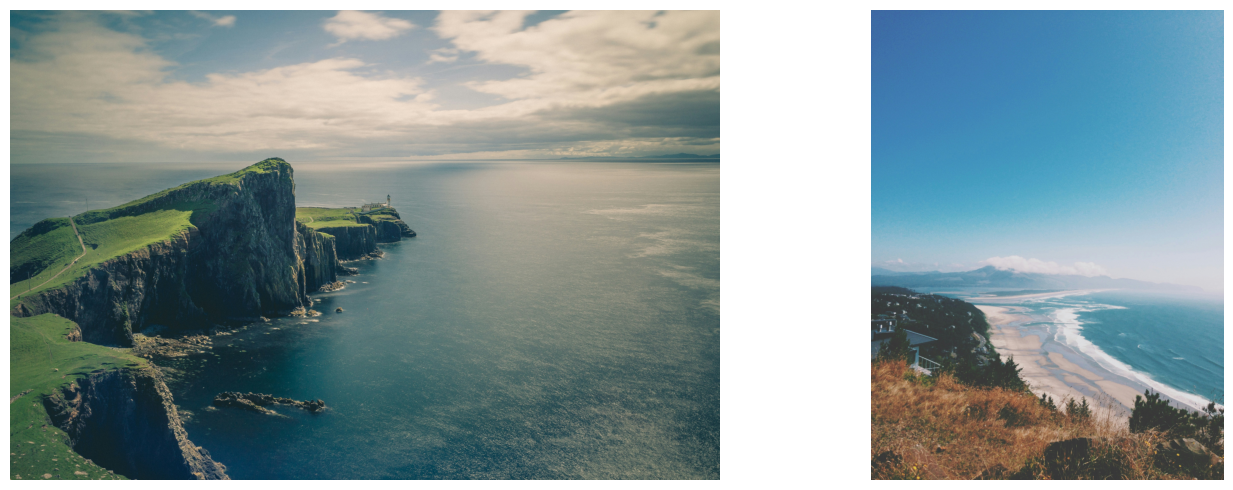

In [21]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def show_images(df, image_column_name):
    num_images = len(df)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    if num_images == 1:
        axes = [axes]
    
    for idx, (image_url, ax) in enumerate(zip(df[image_column_name], axes)):
        response = requests.get(image_url)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content))
        ax.imshow(image)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_images(df, 'photo_image_url')

This code fetches and displays the images using their paths from the metadata.

### Search by Text

We can also perform a similarity search using a text description. Here, we search for the image that is most similar to the description "a photo of a coastal cliff".

In [22]:
query_result = client.query.execute(
    """
    SELECT photo_id
    FROM unsplash_embed_sample
    ORDER BY embedding <-> (
    SELECT 
    thanosql.embed(
        engine := 'huggingface',
        input := 'a photo of a coastal cliff',
        model := 'openai/clip-vit-base-patch32'
        )
    )
    LIMIT 1
    """
)
query_result.records.to_df()

,photo_id
0,bygTaBey1Xk


This query generates an embedding for the text description and retrieves the most similar image based on its embedding.

We then retrieve the meta information for the retrieved image.

In [27]:
query_result = client.query.execute(
    """
    SELECT photo_id,
        photo_image_url, 
        photo_submitted_at, 
        photo_width, 
        photo_height, 
        photographer_username, 
        photographer_first_name, 
        photographer_last_name, 
        exif_camera_make, 
        exif_camera_model, 
        exif_iso, 
        exif_aperture_value, 
        exif_focal_length, 
        exif_exposure_time
    FROM unsplash_meta_sample
    WHERE photo_id 
    IN (
        SELECT photo_id
        FROM unsplash_embed_sample
        ORDER BY embedding <-> (
        SELECT 
        thanosql.embed(
            engine := 'huggingface',
            input := 'a photo of a coastal cliff',
            model := 'openai/clip-vit-base-patch32'
            )
        )
        LIMIT 3
    )
    """
)
df = query_result.records.to_df()
df

,photo_id,photo_image_url,photo_submitted_at,photo_width,photo_height,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time
0,bygTaBey1Xk,https://images.unsplash.com/uploads/1413387620...,2014-10-15,4635,3070,jaspervandermeij,Jasper,van der Meij,PENTAX RICOH IMAGING,GR,100.0,14.0,18.3,8
1,gXSFnk2a9V4,https://images.unsplash.com/reserve/jEs6K0y1Sb...,2014-07-10,2448,3264,kimberlyrichards,Kimberly,Richards,Apple,iPhone 5,50.0,2.4,4.1,1/2358
2,grg6-DNJuaU,https://images.unsplash.com/uploads/1412192004...,2014-10-01,5184,3456,marcusdallcol,Marcus,Dall Col,Canon,Canon EOS REBEL T4i,100.0,7.1,400.0,1/640


This query retrieves metadata for the image that matches the text description.

Finally, we display the retrieved image.
                           

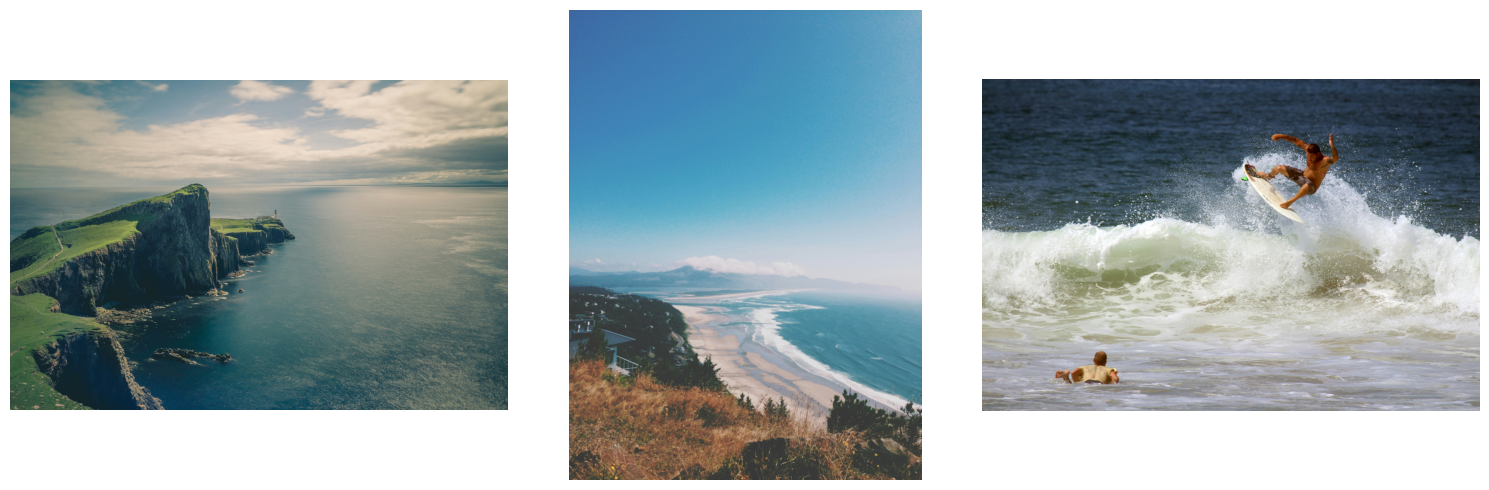

In [28]:
show_images(df, 'photo_image_url')

This code fetches and displays the image using its URL from the metadata.

## Conclusion
By following these steps, you will be able to efficiently manage and retrieve image metadata from large datasets using ThanoSQL. This capability is invaluable for various applications, including art exhibitions, poster production, and digital asset management. The ability to perform both image-based and text-based searches enables a flexible and powerful approach to handling visual data.
